log transform
value counts 
last head

In [1]:
import pandas as pd 

df = pd.read_csv("AMAZON_DATASET.csv")
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [6]:
df.shape

(602, 23)

In [3]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [4]:
df['Product_Search_Method'] = df['Product_Search_Method'].fillna('unknown')

In [5]:
df.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [6]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' +', '_', regex=True)
)


In [7]:
df.columns.duplicated().sum()

np.int64(1)

In [8]:
df = df.loc[:, ~df.columns.duplicated()]

In [13]:
df.head()

,timestamp,age,gender,purchase_frequency,purchase_categories,personalized_recommendation_frequency,browsing_frequency,product_search_method,search_result_exploration,customer_reviews_importance,...,cart_abandonment_factors,saveforlater_frequency,review_left,review_reliability,review_helpfulness,recommendation_helpfulness,rating_accuracy,shopping_satisfaction,service_appreciation,improvement_areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,High shipping costs,Rarely,No,Heavily,Yes,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Found a better price elsewhere,Rarely,No,Occasionally,No,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,High shipping costs,Rarely,No,Heavily,Yes,Yes,2,2,Competitive prices,Product quality and accuracy


In [9]:
data=df.copy()

df.columns = df.columns.map(lambda x: x.strip().lower())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\3706694362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip().str.lower()
C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\3706694362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.strip().str.lower()
C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\3706694362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [10]:
df['purchase_status'] = df['purchase_frequency'].apply(
    lambda x: 0 if x in ['less than once a month', 'once a month'] else 1
)


In [11]:
df['purchase_frequency'].value_counts(dropna=False)


purchase_frequency
few times a month         203
less than once a month    124
once a week               112
once a month              107
multiple times a week      56
Name: count, dtype: int64

In [12]:

df['browsing_frequency'].value_counts(dropna=False)


browsing_frequency
few times a week        249
few times a month       199
rarely                   77
multiple times a day     77
Name: count, dtype: int64

In [13]:

df['cart_completion_frequency'].value_counts(dropna=False)


cart_completion_frequency
sometimes    304
often        158
rarely        72
always        47
never         21
Name: count, dtype: int64

In [14]:

df['cart_abandonment_factors'].value_counts(dropna=False)


cart_abandonment_factors
found a better price elsewhere                255
changed my mind or no longer need the item    241
high shipping costs                            70
others                                         36
Name: count, dtype: int64

In [15]:

df['review_reliability'].value_counts(dropna=False)


review_reliability
moderately      199
occasionally    190
heavily         149
rarely           41
never            23
Name: count, dtype: int64

In [16]:

df['personalized_recommendation_frequency'].value_counts(dropna=False)


personalized_recommendation_frequency
no           251
sometimes    229
yes          122
Name: count, dtype: int64

In [17]:

df['recommendation_helpfulness'].value_counts(dropna=False)


recommendation_helpfulness
sometimes    273
no           172
yes          157
Name: count, dtype: int64

In [18]:

df['add_to_cart_browsing'].value_counts(dropna=False)


add_to_cart_browsing
maybe    248
yes      216
no       138
Name: count, dtype: int64

In [19]:

df['saveforlater_frequency'].value_counts(dropna=False)

saveforlater_frequency
sometimes    251
often        156
rarely        82
never         59
always        54
Name: count, dtype: int64

In [20]:
df['service_appreciation'].value_counts(dropna=False)

service_appreciation
product recommendations                185
competitive prices                     182
wide product selection                 150
user-friendly website/app interface     80
customer service                         2
.                                        1
quick delivery                           1
all the above                            1
Name: count, dtype: int64

In [21]:
df['review_reliability'].value_counts(dropna=False)

review_reliability
moderately      199
occasionally    190
heavily         149
rarely           41
never            23
Name: count, dtype: int64

In [22]:
# ORDINAL ENCODING (MANUAL)


purchase_frequency_map = {
    'less than once a month': 0,
    'once a month': 1,
    'few times a month': 2,
    'once a week': 3,
    'multiple times a week': 4
}

browsing_frequency_map = {
    'rarely': 0,
    'few times a month': 1,
    'few times a week': 2,
    'multiple times a day': 3
}

cart_completion_map = {
    'never': 0,
    'rarely': 1,
    'sometimes': 2,
    'often': 3,
    'always': 4
}

saveforlater_map = {
    'never': 0,
    'rarely': 1,
    'sometimes': 2,
    'often': 3,
    'always': 4
}

binary_frequency_map = {
    'no': 0,
    'sometimes': 1,
    'yes': 2
}

add_to_cart_map = {
    'no': 0,
    'maybe': 1,
    'yes': 2
}

review_reliability_map = {
    'never': 0,
    'rarely': 1,
    'occasionally': 2,
    'moderately': 3,
    'heavily': 4
}


cart_abandonment_map = {
    'found a better price elsewhere': 0,
    'changed my mind or no longer need the item': 1,
    'high shipping costs': 2,
    'others': 3
}

gender_map = {
    'male': 0,
    'female': 1,
    'prefer not to say': 2
}





#  MAPPINGS
df['purchase_frequency'] = df['purchase_frequency'].map(purchase_frequency_map)
df['browsing_frequency'] = df['browsing_frequency'].map(browsing_frequency_map)
df['cart_completion_frequency'] = df['cart_completion_frequency'].map(cart_completion_map)
df['saveforlater_frequency'] = df['saveforlater_frequency'].map(saveforlater_map)
df['personalized_recommendation_frequency'] = df['personalized_recommendation_frequency'].map(binary_frequency_map)
df['recommendation_helpfulness'] = df['recommendation_helpfulness'].map(binary_frequency_map)
df['add_to_cart_browsing'] = df['add_to_cart_browsing'].map(add_to_cart_map)
df['review_reliability'] = df['review_reliability'].map(review_reliability_map)
df['cart_abandonment_factors'] = df['cart_abandonment_factors'].map(cart_abandonment_map)
df['gender'] = df['gender'].replace(gender_map)
df['review_left'] = df['review_left'].replace({'no': 0, 'yes': 1})
df['review_helpfulness'] = df['review_helpfulness'].replace({'no': 0, 'yes': 1})



C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\2224712901.py:84: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['review_left'] = df['review_left'].replace({'no': 0, 'yes': 1})


In [24]:
df['review_helpfulness'] = (
    df['review_helpfulness']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({'yes': 1, 'no': 0})
)

df['review_helpfulness'] = pd.to_numeric(
    df['review_helpfulness'], errors='coerce'
).fillna(0).astype(int)


In [25]:
service_appreciation_map = {
    'competitive prices': 3,
    'wide product selection': 3,
    'product recommendations': 3,

    'user-friendly website/app interface': 2,
    'customer service': 2,

    'quick delivery': 2,
    'all the above': 3,

    '.': 1
}

# After mapping
df['service_appreciation'] = (
    df['service_appreciation']
    .astype(str)
    .str.strip()
    .str.lower()
    .map(service_appreciation_map)
)

# 🔑 ML-safe fallback
df['service_appreciation'] = df['service_appreciation'].fillna(1)

# Now convert
df['service_appreciation'] = df['service_appreciation'].astype(int)




In [26]:
df.head()

,timestamp,age,gender,purchase_frequency,purchase_categories,personalized_recommendation_frequency,browsing_frequency,product_search_method,search_result_exploration,customer_reviews_importance,...,saveforlater_frequency,review_left,review_reliability,review_helpfulness,recommendation_helpfulness,rating_accuracy,shopping_satisfaction,service_appreciation,improvement_areas,purchase_status
0,2023/06/04 1:28:19 pm gmt+5:30,23,1,2,beauty and personal care,2,2,keyword,multiple pages,1,...,2,1,2,1,2,1,1,3,reducing packaging waste,1
1,2023/06/04 2:30:44 pm gmt+5:30,23,1,1,clothing and fashion,2,1,keyword,multiple pages,1,...,1,0,4,1,1,3,2,3,reducing packaging waste,0
2,2023/06/04 5:04:56 pm gmt+5:30,24,2,2,groceries and gourmet food;clothing and fashion,0,1,keyword,multiple pages,2,...,1,0,2,0,0,3,3,3,product quality and accuracy,1
3,2023/06/04 5:13:00 pm gmt+5:30,24,1,1,beauty and personal care;clothing and fashion;...,1,1,keyword,first page,5,...,2,1,4,1,1,3,4,3,product quality and accuracy,0
4,2023/06/04 5:28:06 pm gmt+5:30,22,1,0,beauty and personal care;clothing and fashion,2,1,filter,multiple pages,1,...,1,0,4,1,2,2,2,3,product quality and accuracy,0


In [27]:
#Higher = more active → higher purchase probability
#Why: Active users buy more.
df['engagement_score'] = (
    df['browsing_frequency'] +
    df['purchase_frequency']
)

#High value → user moves closer to checkout
#Why: Cart behavior = strongest intent signal
df['cart_intent_score'] = (
    df['add_to_cart_browsing'] +
    df['cart_completion_frequency']
)

#High trust → less hesitation → purchase
#Users trusting reviews convert more
df['review_trust_score'] = (
    df['review_reliability'] +
    df['review_helpfulness']
)

#Why: Review writers are engaged customers
#1= engaged user
#0 = passive browser
df['is_reviewer'] = (df['review_left'] == 'yes').astype(int)

#High = recommender system works on this user
#Why: If recommendations work → higher conversion
df['recommendation_influence'] = (
    df['personalized_recommendation_frequency'] +
    df['recommendation_helpfulness']
)

#Higher satisfaction → higher purchase chance
#Why: Happy users buy again
df['satisfaction_score'] = (
    df['shopping_satisfaction'] +
    df['service_appreciation'] +
    df['rating_accuracy']
)

# Abandonment reasons hurt conversion
#1= user faced friction
#0 = smooth journey
df['has_cart_friction'] = (
    df['cart_abandonment_factors'].notna()
).astype(int)


#1 = explores multiple categories
#0 = focused buyer
#Explorers vs focused buyers
df['multi_category_user'] = (
    df['purchase_categories'].str.contains(';', na=False)
).astype(int)

df['purchase_intent_score'] = (
    df['engagement_score'] +
    df['cart_intent_score'] +
    df['review_trust_score'] +
    df['recommendation_influence'] +
    df['satisfaction_score']
)








In [28]:
numeric_check_cols = [
    'browsing_frequency',
    'purchase_frequency',
    'add_to_cart_browsing',
    'cart_completion_frequency',
    'review_reliability',
    'review_helpfulness',
    'personalized_recommendation_frequency',
    'recommendation_helpfulness',
    'shopping_satisfaction',
    'service_appreciation',
    'rating_accuracy'
]

df[numeric_check_cols].dtypes


browsing_frequency                       int64
purchase_frequency                       int64
add_to_cart_browsing                     int64
cart_completion_frequency                int64
review_reliability                       int64
review_helpfulness                       int64
personalized_recommendation_frequency    int64
recommendation_helpfulness               int64
shopping_satisfaction                    int64
service_appreciation                     int64
rating_accuracy                          int64
dtype: object

In [29]:
#: Does higher engagement really convert?
"""Engagement Score represents how actively a user browses and shops on the platform; 
   higher engagement strongly increases purchase probability."""

df.groupby('engagement_score')['purchase_status'] \
  .agg(['count', 'mean']) \
  .rename(columns={'mean': 'purchase_rate'})


,count,purchase_rate
engagement_score,,
0,50,0.000000
1,51,0.000000
2,79,0.139241
3,125,0.600000
4,147,0.918367
5,87,1.000000
6,47,1.000000
7,16,1.000000


In [30]:
#Cart Intent vs Purchase
"""Shows how close a user is to completing a purchase based on cart actions."""

pd.crosstab(
    df['cart_intent_score'],
    df['purchase_status'],
    normalize='index'
)


purchase_status,0,1
cart_intent_score,,
0,0.750000,0.250000
1,0.300000,0.700000
2,0.350000,0.650000
3,0.315000,0.685000
4,0.490323,0.509677
5,0.439024,0.560976
6,0.222222,0.777778


In [31]:
#Trust → Conversion
#Do users who trust reviews buy more?
"""Captures how much users rely on reviews before buying."""

df.groupby('review_trust_score')['purchase_status'].mean()


review_trust_score
0    0.428571
1    0.583333
2    0.777070
3    0.722222
4    0.513043
5    0.387387
Name: purchase_status, dtype: float64

In [32]:
#Whether recommender system  actually help users buy?
#Indicates how strongly personalized recommendations affect purchases.
"""Lower scores → weak recommendation impact
   Higher scores → recommender system engagement
                                     
 
 0      User ignores recommendations             
 1      Weak influence                           
 2      Moderate influence                       
 3      Strong influence                         
 4     Recommendations strongly guide purchases 
"""

df.groupby('recommendation_influence')['purchase_status'].mean()


recommendation_influence
0    0.633663
1    0.564885
2    0.652361
3    0.564706
4    0.634615
Name: purchase_status, dtype: float64

In [33]:
#Satisfaction vs Purchase
#Happy users → repeat buyers
"""Purchase improves with moderate–high satisfaction,
   Extremely high expectations don’t guarantee purchases
   4–6	Low satisfaction
   7–9	Moderately satisfied
   10–11	Highly satisfied
   12–13	Very high expectations / demanding users"""

df.groupby('satisfaction_score')['purchase_status'].mean()


satisfaction_score
4     0.571429
5     0.696970
6     0.486111
7     0.539683
8     0.694215
9     0.682119
10    0.685185
11    0.476190
12    0.384615
13    0.500000
Name: purchase_status, dtype: float64

In [34]:
#Friction Analysis
#How much cart issues hurt conversion?
"""Identifies whether users faced obstacles during checkout"""
pd.crosstab(
    df['has_cart_friction'],
    df['purchase_status'],
    normalize='index'
)


purchase_status,0,1
has_cart_friction,,
1,0.383721,0.616279


In [36]:
#User Type Analysis (Explorers vs Focused Buyers)
#Shows whether exploring multiple categories increases purchase.
"""0 → Focused buyer
   1 → Explorer (multiple categories)"""

pd.crosstab(
    df['multi_category_user'],
    df['purchase_status'],
    normalize='index'
)


purchase_status,0,1
multi_category_user,,
0,0.409396,0.590604
1,0.358553,0.641447


In [37]:
df['\nEngagement_Level\n'] = pd.cut(
    df['engagement_score'],
    bins=[-1, 1, 3, 10],
    labels=['Low', 'Medium', 'High']
)
df.groupby('engagement_score')['purchase_status'].mean()



engagement_score
0    0.000000
1    0.000000
2    0.139241
3    0.600000
4    0.918367
5    1.000000
6    1.000000
7    1.000000
Name: purchase_status, dtype: float64

In [38]:
df['cart_intent_level'] = pd.cut(
    df['cart_intent_score'],
    bins=[-1, 1, 3, 10],
    labels=['Low', 'Medium', 'High']
)
df.groupby('cart_intent_level')['purchase_status'].mean()


C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\1117671057.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cart_intent_level')['purchase_status'].mean()


cart_intent_level
Low       0.605263
Medium    0.673333
High      0.553030
Name: purchase_status, dtype: float64

In [39]:
df['satisfaction_level'] = pd.cut(
    df['satisfaction_score'],
    bins=[0, 6, 9, 13],
    labels=['Low', 'Medium', 'High']
)
df.groupby('satisfaction_level')['purchase_status'].mean()


C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\1159394693.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('satisfaction_level')['purchase_status'].mean()


satisfaction_level
Low       0.553571
Medium    0.640704
High      0.586957
Name: purchase_status, dtype: float64

In [40]:
df['recommendation_level'] = pd.cut(
    df['recommendation_influence'],
    bins=[-1, 1, 3, 5],
    labels=['Low', 'Medium', 'High']
)
df.groupby('recommendation_level')['purchase_status'].mean()



C:\Users\Bhavna kumawat\AppData\Local\Temp\ipykernel_6788\1654311544.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('recommendation_level')['purchase_status'].mean()


recommendation_level
Low       0.594828
Medium    0.628931
High      0.634615
Name: purchase_status, dtype: float64

In [41]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_summary[col] = ((df[col] < lower) | (df[col] > upper)).sum()

outlier_summary


{'age': np.int64(20),
 'purchase_frequency': np.int64(0),
 'personalized_recommendation_frequency': np.int64(0),
 'browsing_frequency': np.int64(0),
 'customer_reviews_importance': np.int64(0),
 'add_to_cart_browsing': np.int64(0),
 'cart_completion_frequency': np.int64(21),
 'cart_abandonment_factors': np.int64(36),
 'saveforlater_frequency': np.int64(59),
 'review_left': np.int64(0),
 'review_reliability': np.int64(23),
 'review_helpfulness': np.int64(0),
 'recommendation_helpfulness': np.int64(0),
 'rating_accuracy': np.int64(21),
 'shopping_satisfaction': np.int64(17),
 'service_appreciation': np.int64(84),
 'purchase_status': np.int64(0),
 'engagement_score': np.int64(0),
 'cart_intent_score': np.int64(65),
 'review_trust_score': np.int64(0),
 'is_reviewer': np.int64(0),
 'recommendation_influence': np.int64(52),
 'satisfaction_score': np.int64(4),
 'has_cart_friction': np.int64(0),
 'multi_category_user': np.int64(0),
 'purchase_intent_score': np.int64(3)}

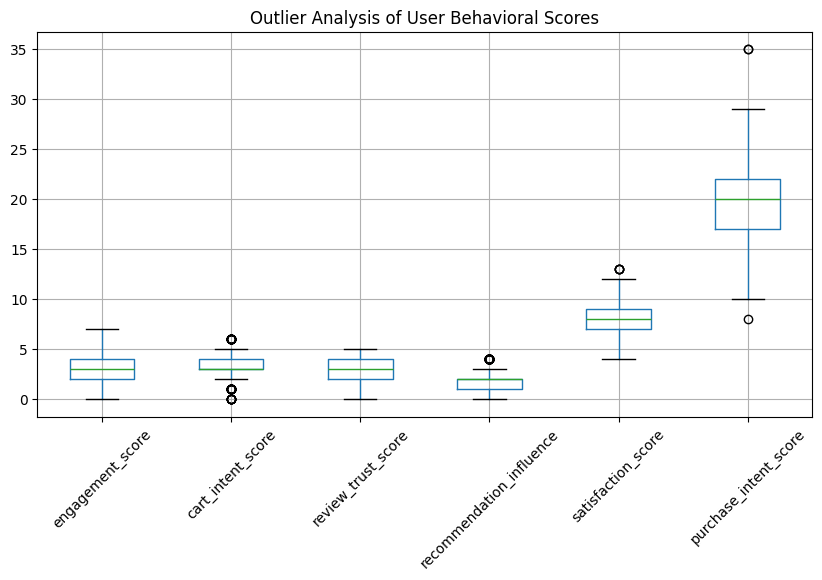

In [42]:
"""No outlier treatment is applied because these values represent 
   real high-intent customers and improve model learning."""

outlier_cols = [
    'engagement_score',
    'cart_intent_score',
    'review_trust_score',
    'recommendation_influence',
    'satisfaction_score',
    'purchase_intent_score'
]
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df[outlier_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Analysis of User Behavioral Scores")
plt.show()


In [43]:
df['purchase_status'].value_counts(normalize=True)


purchase_status
1    0.616279
0    0.383721
Name: proportion, dtype: float64

MODEL BUILDING

In [44]:
# LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

final_features = [
    'engagement_score',
    'cart_intent_score',
    'review_trust_score',
    'recommendation_influence',
    'satisfaction_score',
    'purchase_intent_score',
    'has_cart_friction',
    'multi_category_user',
    'is_reviewer'
]

X = df[final_features]
y = df['purchase_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

log_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))



Accuracy: 0.9090909090909091
ROC-AUC: 0.9782608695652174
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        46
           1       0.91      0.95      0.93        75

    accuracy                           0.91       121
   macro avg       0.91      0.90      0.90       121
weighted avg       0.91      0.91      0.91       121



In [45]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))



Accuracy: 0.8925619834710744
ROC-AUC: 0.9675362318840581
              precision    recall  f1-score   support

           0       0.92      0.78      0.85        46
           1       0.88      0.96      0.92        75

    accuracy                           0.89       121
   macro avg       0.90      0.87      0.88       121
weighted avg       0.90      0.89      0.89       121



In [46]:
# GRADIENT BOOSTING 

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))
print(classification_report(y_test, y_pred_gb))



Accuracy: 0.859504132231405
ROC-AUC: 0.9757971014492755
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        46
           1       0.85      0.93      0.89        75

    accuracy                           0.86       121
   macro avg       0.86      0.84      0.85       121
weighted avg       0.86      0.86      0.86       121



COMPARING MODELS

In [47]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def model_metrics(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1_Score': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_prob)
    }

results = pd.DataFrame([
    model_metrics('Logistic Regression', log_model, X_test, y_test),
    model_metrics('Random Forest', rf_model, X_test, y_test),
    model_metrics('Gradient Boosting', gb_model, X_test, y_test)
])

results.round(3)


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression,0.909,0.910,0.947,0.928,0.978
1,Random Forest,0.893,0.878,0.960,0.917,0.968
2,Gradient Boosting,0.860,0.854,0.933,0.892,0.976


“Among all models, Logistic Regression delivered the best overall performance with 91% accuracy and the highest ROC-AUC, while remaining fully interpretable for business decision-making.”

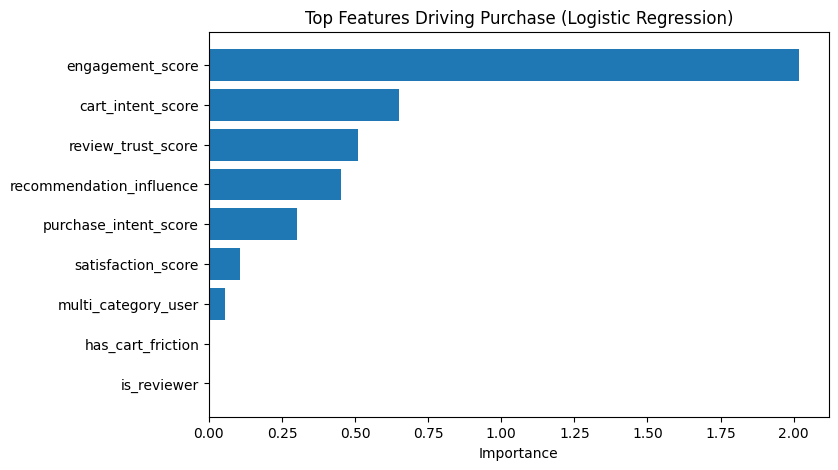

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': log_model.coef_[0]
})

# Absolute importance (strength)
feature_importance['abs_importance'] = feature_importance['importance'].abs()

# Sort
feature_importance = feature_importance.sort_values(
    by='abs_importance', ascending=False
)

# Plot top 10
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance['feature'][:10][::-1],
    feature_importance['abs_importance'][:10][::-1]
)
plt.title('Top Features Driving Purchase (Logistic Regression)')
plt.xlabel('Importance')
plt.show()


CHECKING UNDERFITTING AND OVERFITTING

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score

def overfitting_check(model, X_train, X_test, y_train, y_test, name):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_prob = model.predict_proba(X_train)[:, 1]
    test_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}")
    print("-" * 40)
    print(f"Train Accuracy : {accuracy_score(y_train, train_pred):.3f}")
    print(f"Test Accuracy  : {accuracy_score(y_test, test_pred):.3f}")
    print(f"Train ROC-AUC  : {roc_auc_score(y_train, train_prob):.3f}")
    print(f"Test ROC-AUC   : {roc_auc_score(y_test, test_prob):.3f}")
    
overfitting_check(log_model, X_train, X_test, y_train, y_test, "Logistic Regression")
overfitting_check(rf_model, X_train, X_test, y_train, y_test, "Random Forest")
overfitting_check(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")




Logistic Regression
----------------------------------------
Train Accuracy : 0.879
Test Accuracy  : 0.909
Train ROC-AUC  : 0.958
Test ROC-AUC   : 0.978

Random Forest
----------------------------------------
Train Accuracy : 0.963
Test Accuracy  : 0.893
Train ROC-AUC  : 0.996
Test ROC-AUC   : 0.968

Gradient Boosting
----------------------------------------
Train Accuracy : 0.944
Test Accuracy  : 0.860
Train ROC-AUC  : 0.982
Test ROC-AUC   : 0.976


All models perform well, but Logistic Regression provides the best balance between accuracy, generalization, and business reliability, making it the most suitable production model.”


Feature scaling was evaluated but not applied, as the dataset consists of bounded ordinal features with similar ranges, and tree-based models used are scale-invariant. Logistic regression also showed strong convergence and performance without scaling.

In [50]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient':log_model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

coef_df


,feature,coefficient
0,engagement_score,2.019242
5,purchase_intent_score,0.301466
8,is_reviewer,0.000000
6,has_cart_friction,-0.000372
7,multi_category_user,-0.053687
4,satisfaction_score,-0.106836
3,recommendation_influence,-0.451135
2,review_trust_score,-0.509525
1,cart_intent_score,-0.650281


In [51]:
y_proba = log_model.predict_proba(X_test)[:, 1]

custom_threshold = 0.5
y_pred_custom = (y_proba >= custom_threshold).astype(int)
print(y_pred_custom)



[0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 1 1 0]


In [52]:
""" [[TN  FP]
 [FN  TP]]

 TN → correctly predicted non-buyers

FP → predicted buyer but didn’t buy (costly mistake)

FN → missed buyer (lost revenue)

TP → correctly predicted buyers

Your baseline (threshold = 0.5):


39 non-buyers correctly ignored

7 people targeted who didn’t buy

4 buyers missed

71 buyers correctly identified"""


from sklearn.metrics import  confusion_matrix
for t in [0.3, 0.4, 0.5, 0.6]:
    preds = (y_proba >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(confusion_matrix(y_test, preds))



Threshold: 0.3
[[37  9]
 [ 3 72]]

Threshold: 0.4
[[38  8]
 [ 3 72]]

Threshold: 0.5
[[39  7]
 [ 4 71]]

Threshold: 0.6
[[44  2]
 [ 9 66]]


In [53]:
from sklearn.metrics import precision_score, recall_score

for t in [0.3, 0.4, 0.5, 0.6, 0.7]:

    
    preds = (y_proba >= t).astype(int)
    print(
        f"Threshold {t} | "
        f"Precision: {precision_score(y_test, preds):.2f} | "
        f"Recall: {recall_score(y_test, preds):.2f}"
    )

Threshold 0.3 | Precision: 0.89 | Recall: 0.96
Threshold 0.4 | Precision: 0.90 | Recall: 0.96
Threshold 0.5 | Precision: 0.91 | Recall: 0.95
Threshold 0.6 | Precision: 0.97 | Recall: 0.88
Threshold 0.7 | Precision: 0.97 | Recall: 0.85


In [54]:
"""The model predicts the probability of purchase.
If the probability is 50% or more, we consider the user likely to purchase.
If it is below 50%, we consider the user unlikely to purchase.

“We selected a 0.5 threshold because it is the standard and unbiased probability cut-off.
 It balances conversion and cost, avoids excessive false predictions, and is appropriate when business costs are not explicitly defined.

The threshold can be adjusted based on business objectives.
For example, lower thresholds for marketing campaigns and higher thresholds for cost-sensitive decisions."""

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[39  7]
 [ 4 71]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        46
           1       0.91      0.95      0.93        75

    accuracy                           0.91       121
   macro avg       0.91      0.90      0.90       121
weighted avg       0.91      0.91      0.91       121



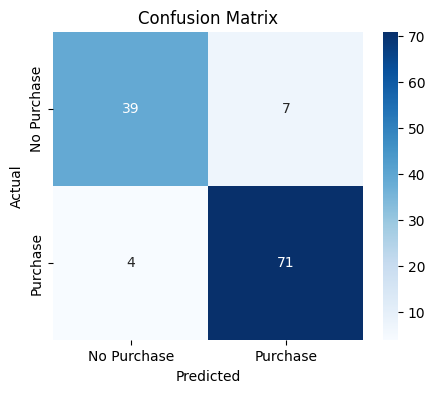

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Purchase', 'Purchase'],
    yticklabels=['No Purchase', 'Purchase']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


39 → True Negatives (TN)
Users who did NOT purchase and were correctly predicted as not purchasing

7 → False Positives (FP)
Users who did NOT purchase but were predicted as purchasing
-Wasted offer / false alarm

4 → False Negatives (FN)
Users who DID purchase but were predicted as not purchasing
- Missed opportunity

71 → True Positives (TP)
Users who DID purchase and were correctly predicted

In [56]:
"""0.0 – 0.39 → Low

0.40 – 0.69 → Medium

0.70 – 1.00 → High

We segmented users into Low, Medium, and High intent based on predicted purchase probability 
to enable targeted marketing strategies and improve conversion efficiency

1)Low Intent

Definition (easy):
Users who are very unlikely to purchase.

What to provide them:

Do not spend ads

Show generic content only

Retarget later (low priority)

2) Medium Intent

Definition (easy):
Users who are interested but not fully convinced.

What to provide them:

Discounts / coupons

Free shipping

Reminder emails / notifications
➡️ Goal: push them to High Intent

3) High Intent

Definition (easy):
Users who are very likely to purchase.

What to provide them:

Strong CTA (Buy Now)

Limited-time offers

Personalized recommendations
➡️ Goal: convert immediately

# Intent segmentation helps allocate marketing budget efficiently by targeting users based on purchase likelihood"""

y_proba = log_model.predict_proba(X)[:, 1]
def intent_bucket(p):
    if p < 0.4:
        return 'Low Intent'
    elif p < 0.7:
        return 'Medium Intent'
    else:
        return 'High Intent'

df['purchase_probability'] = y_proba
df['intent_segment'] = df['purchase_probability'].apply(intent_bucket)
df['intent_segment'].value_counts(normalize=True)


intent_segment
High Intent      0.504983
Low Intent       0.363787
Medium Intent    0.131229
Name: proportion, dtype: float64

In [57]:
"""For each intent segment,
it shows what percentage of users actually purchased vs did not purchase

* High Intent users → ~95% purchase rate

* Medium Intent users → ~70% purchase rate

* Low Intent users → ~12% purchase rate"""
pd.crosstab(
    df['intent_segment'],
    df['purchase_status'],
    normalize='index'
)


purchase_status,0,1
intent_segment,,
High Intent,0.049342,0.950658
Low Intent,0.881279,0.118721
Medium Intent,0.291139,0.708861


In [58]:
""" Users with low engagement rarely purchase, while highly engaged users almost always convert,
 proving engagement as a strong predictor of buying behavior"""

def engagement_bucket(score):
    if score <= 2:
        return 'Low Engagement'
    elif score <= 4:
        return 'Medium Engagement'
    else:
        return 'High Engagement'

df['engagement_level'] = df['engagement_score'].apply(engagement_bucket)

engagement_bucket_insight = (
    df.groupby('engagement_level')['purchase_status']
    .agg(count='count', purchase_rate='mean')
)

engagement_bucket_insight


,count,purchase_rate
engagement_level,,
High Engagement,150,1.000000
Low Engagement,180,0.061111
Medium Engagement,272,0.772059


In [59]:
def cart_intent_bucket(score):
    if score <= 1:
        return 'Low Intent'
    elif score <= 3:
        return 'Medium Intent'
    else:
        return 'High Intent'

df['cart_intent_level'] = df['cart_intent_score'].apply(cart_intent_bucket)

cart_intent_insight = (
    df.groupby('cart_intent_level')['purchase_status']
    .agg(count='count', purchase_rate='mean')
)

cart_intent_insight



,count,purchase_rate
cart_intent_level,,
High Intent,264,0.553030
Low Intent,38,0.605263
Medium Intent,300,0.673333


In [61]:
def review_trust_bucket(score):
    if score <= 1:
        return 'Low Trust'
    elif score <= 3:
        return 'Medium Trust'
    else:
        return 'High Trust'

df['review_trust_level'] = df['review_trust_score'].apply(review_trust_bucket)

review_trust_insight = (
    df.groupby('review_trust_level')['purchase_status']
    .agg(count='count', purchase_rate='mean')
)

review_trust_insight


,count,purchase_rate
review_trust_level,,
High Trust,226,0.451327
Low Trust,57,0.526316
Medium Trust,319,0.749216


In [62]:
def recommendation_bucket(score):
    if score <= 1:
        return 'Low Influence'
    elif score <= 3:
        return 'Medium Influence'
    else:
        return 'High Influence'

df['recommendation_level'] = df['recommendation_influence'].apply(recommendation_bucket)

recommendation_insight = (
    df.groupby('recommendation_level')['purchase_status']
    .agg(count='count', purchase_rate='mean')
)

recommendation_insight


,count,purchase_rate
recommendation_level,,
High Influence,52,0.634615
Low Influence,232,0.594828
Medium Influence,318,0.628931


In [63]:
def satisfaction_bucket(score):
    if score <= 5:
        return 'Low Satisfaction'
    elif score <= 9:
        return 'Medium Satisfaction'
    else:
        return 'High Satisfaction'

df['satisfaction_level'] = df['satisfaction_score'].apply(satisfaction_bucket)

satisfaction_insight = (
    df.groupby('satisfaction_level')['purchase_status']
    .agg(count='count', purchase_rate='mean')
)

satisfaction_insight


,count,purchase_rate
satisfaction_level,,
High Satisfaction,92,0.586957
Low Satisfaction,40,0.675000
Medium Satisfaction,470,0.617021


In [64]:
multi_category_insight = (
    df.groupby('multi_category_user')['purchase_status']
    .agg(count='count', purchase_rate='mean')
)

multi_category_insight




,count,purchase_rate
multi_category_user,,
0,298,0.590604
1,304,0.641447


In [82]:
# Final features used by the trained model
final_features = list(log_model.feature_names_in_)

final_features


['engagement_score',
 'cart_intent_score',
 'review_trust_score',
 'recommendation_influence',
 'satisfaction_score',
 'purchase_intent_score',
 'has_cart_friction',
 'multi_category_user',
 'is_reviewer']

In [83]:
# Predict probability of purchase (class = 1)
y_proba = log_model.predict_proba(df[final_features])[:, 1]

df['purchase_probability'] = y_proba
df[['purchase_probability']].head()


,purchase_probability
0,0.762851
1,0.029187
2,0.593688
3,0.089354
4,0.002803


In [84]:
def intent_bucket(p):
    if p < 0.4:
        return 'Low Intent'
    elif p < 0.7:
        return 'Medium Intent'
    else:
        return 'High Intent'

df['intent_segment'] = df['purchase_probability'].apply(intent_bucket)

df['intent_segment'].value_counts(normalize=True)


intent_segment
High Intent      0.504983
Low Intent       0.363787
Medium Intent    0.131229
Name: proportion, dtype: float64

In [85]:
intent_purchase_rate = (
    df.groupby('intent_segment')['purchase_status']
    .mean()
)

intent_purchase_rate


intent_segment
High Intent      0.950658
Low Intent       0.118721
Medium Intent    0.708861
Name: purchase_status, dtype: float64

In [86]:
def final_business_decision(p):
    if p < 0.4:
        return 'Low Intent – No marketing spend'
    elif p < 0.7:
        return 'Medium Intent – Send reminder / recommendations'
    else:
        return 'High Intent – Target with offer / discount'

df['intent_action'] = df['purchase_probability'].apply(final_business_decision)

df[['purchase_probability', 'intent_action']].head()


,purchase_probability,intent_action
0,0.762851,High Intent – Target with offer / discount
1,0.029187,Low Intent – No marketing spend
2,0.593688,Medium Intent – Send reminder / recommendations
3,0.089354,Low Intent – No marketing spend
4,0.002803,Low Intent – No marketing spend


In [87]:
final_output_cols = (
    final_features +
    ['purchase_probability', 'purchase_status', 'recommended_action']
)

final_df = df[final_output_cols]
final_df.head()


,engagement_score,cart_intent_score,review_trust_score,recommendation_influence,satisfaction_score,purchase_intent_score,has_cart_friction,multi_category_user,is_reviewer,purchase_probability,purchase_status,recommended_action
0,4,4,3,4,5,20,1,0,0,0.762851,1,Target with offer / discount
1,2,5,5,3,8,23,1,0,0,0.029187,0,No marketing spend
2,3,4,2,0,9,18,1,1,0,0.593688,1,Send reminder / product recommendation
3,2,3,5,2,10,22,1,1,0,0.089354,0,No marketing spend
4,1,4,5,4,7,21,1,1,0,0.002803,0,No marketing spend


In [88]:
import pickle

with open("purchase_intent_model.pkl", "wb") as f:
    pickle.dump(log_model, f)


In [89]:

model_metadata = {
    'model_name': 'Logistic Regression',
    'features_used': final_features,
    'intent_thresholds': {
        'low_intent': '< 0.4',
        'medium_intent': '0.4 – 0.7',
        'high_intent': '> 0.7'
    },
    'evaluation_metric': 'ROC-AUC',
    'roc_auc_score': 0.978,
    'business_goal': 'Identify high-intent users and optimize marketing spend',
    'output_column': 'recommended_action'
}

with open("model_metadata.pkl", "wb") as f:
    pickle.dump(model_metadata, f)


In [92]:
final_df.to_csv("purchase_intent_predictions.csv", index=False)
